<a href="https://colab.research.google.com/github/Andreslakes/Bici-al-Trabajo-2026/blob/main/Andres_Lagos_Oriana_Tayakee_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

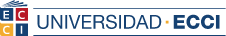
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**
¡Claro que sí! Aquí tienes una versión mejorada de esas instrucciones, con un formato más claro, un flujo de trabajo detallado y consejos para una colaboración efectiva.

---

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub:**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo.

---

#### **Fase 2: Planificación y División de Tareas**

Antes de escribir código, el equipo completo debe:

1.  **Revisar las Preguntas:**
    * Abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
        [https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb](https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb)

2.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable.
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

---

#### **Fase 3: Desarrollo y Colaboración (Colab + GitHub)**

Este es el flujo de trabajo que cada integrante debe seguir para completar su parte.

1.  **Crear el Notebook del Taller:**
    * En el repositorio de GitHub del grupo, hagan clic en **"Add file" > "Create new file"**.
    * Nombren el archivo `Taller_Bici_al_Trabajo.ipynb`. Al tener la extensión `.ipynb`, GitHub lo reconocerá como un notebook. Dejen el contenido en blanco por ahora y guarden el archivo.

2.  **Trabajar en la Parte Asignada:**
    * Cada integrante debe ir al repositorio del grupo y abrir el archivo `Taller_Bici_al_Trabajo.ipynb`.
    * Hagan clic en el ícono de "Open in Colab" para empezar a trabajar.
    * Desarrollen **únicamente** la sección o las preguntas que les fueron asignadas.

3.  **Estructura de las Respuestas:**
    * Por cada pregunta que respondan, deben seguir esta estructura de manera obligatoria:
        * **Un título en una celda de texto** que enuncie la pregunta completa.
        * **Una o más celdas de código** con el desarrollo para resolver la pregunta. **El código debe estar ejecutado**, mostrando los resultados (tablas, gráficos, etc.).
        * **Una celda de texto final** con la **"Interpretación"**, donde expliquen en prosa los resultados obtenidos y las conclusiones de su análisis.

4.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

---

#### **Consejos para una Colaboración Exitosa:**

* **Comunicación Constante:** Antes de guardar tus cambios en GitHub, avisa a tus compañeros. Si dos personas guardan cambios en la misma parte del notebook al mismo tiempo, se puede generar un conflicto difícil de resolver.
* **Trabajar en Orden:** Para evitar problemas, pueden establecer turnos para guardar los cambios en el repositorio principal. Por ejemplo: primero guarda el Estudiante 1, luego el Estudiante 2 (después de abrir la versión actualizada) y así sucesivamente.
* **Revisión Final:** Antes de la fecha de entrega, una persona debe hacer una revisión final del notebook completo para asegurar que el formato sea consistente y que todas las celdas estén ejecutadas.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()

# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

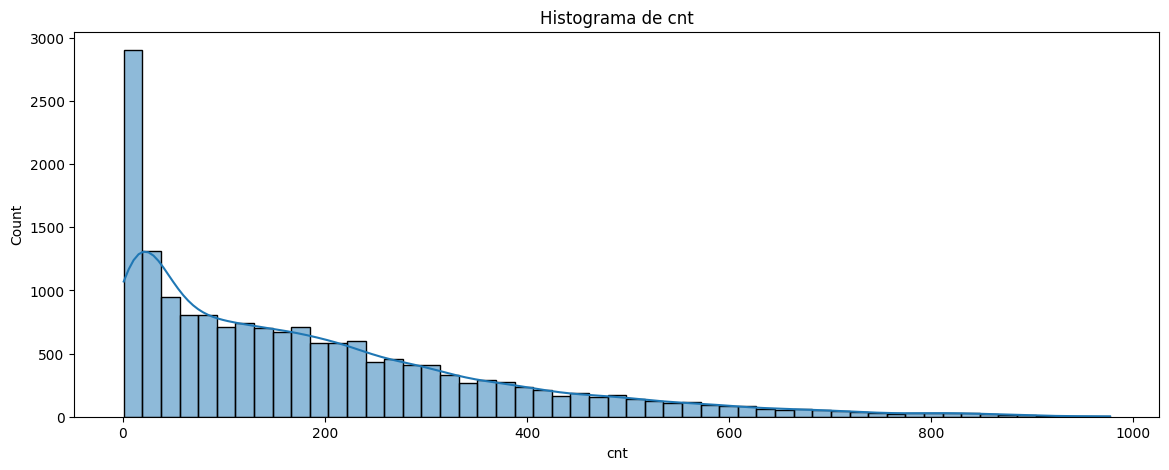

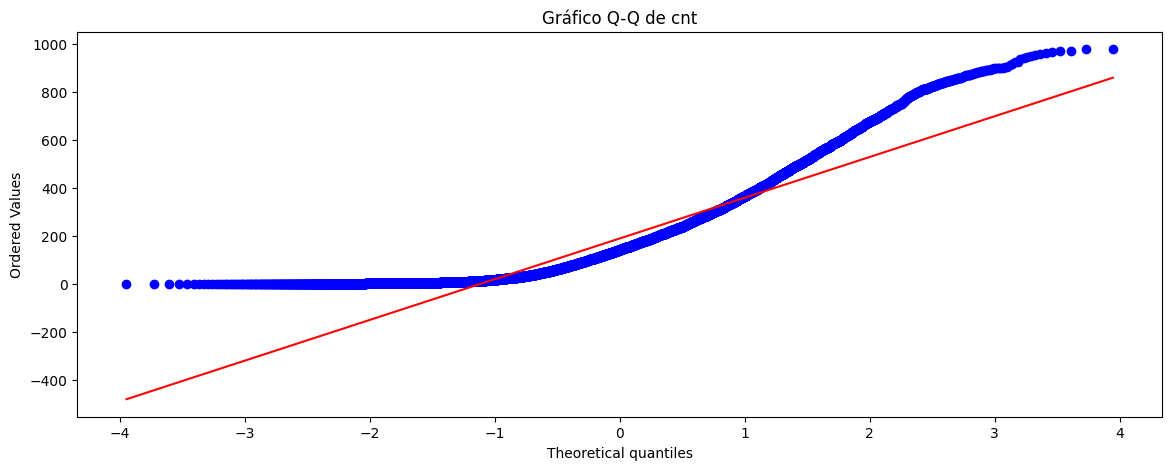

In [ ]:
# 1. Visualización
plt.figure(figsize=(14, 5))
sns.histplot(df['cnt'], kde=True)
plt.title('Histograma de cnt')
plt.show()

# 2. Gráfico Q-Q
plt.figure(figsize=(14, 5))
stats.probplot(df['cnt'], dist='norm', plot=plt)
plt.title('Gráfico Q-Q de cnt')
plt.show()

### **Interpretación pregunta 1**

1.El histograma cnt indica que los datos no siguen una distribucion normal, la mayoria de los valores se concentran en el area de la parte baja llegando al cero y se tienen menos casos con valores altos que se acencan a 1000, esto genera una tendencia hacia la derecha lo que indica que tiene varios valores atipicos muy altos.

2.En el grafico Q-Q  se observa que los puntos en azul no se alinean sobre la línea roja la concentración en la parte de abajo lo que refleja es  la gran cantidad de valores pequeños. hacia los valores altos los puntos se desvían por encima de la línea, indicando la presencia de colas mas largas y valores extremos.


## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [11]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
df_corr = df[columnas_relacion]

#correlacion de pearson (Mide la relacion lineal entre dos variables)
corr_pearson = df_corr.corr(method='pearson')
print("Correlacion_pearson")
print(corr_pearson)


#Correlacion de spearman (Mide una relacion monotona creciente o decreciente) aunque no sea lineal
corr_spearman = df_corr.corr(method='spearman')
print("Correlacion_spearman")
print(corr_spearman)


Correlacion_pearson
                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000
Correlacion_spearman
                cnt      temp       hum  windspeed
cnt        1.000000  0.423330 -0.359614   0.126629
temp       0.423330  1.000000 -0.055408  -0.009719
hum       -0.359614 -0.055408  1.000000  -0.293913
windspeed  0.126629 -0.009719 -0.293913   1.000000


### **Interpretación pregunta 2**

1.  El cnt esta debil positiva relacionado con la temperatura  con un valor de 0.404772 lo que suguiere que cuando la temperatura aumenta el numero de viajes tambien aumenta.
2.  Se tiene una relacion debil negativa entre cnt y hum de -0.32 esto indica que a mayor humedad se reduce el numero de viajes.
3.  El winspeed tiene una relacion debil positiva relevante con cnt 0.093234.
4.  No se tiene una fuerte dependencia entre temperatura, humedad y viento.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

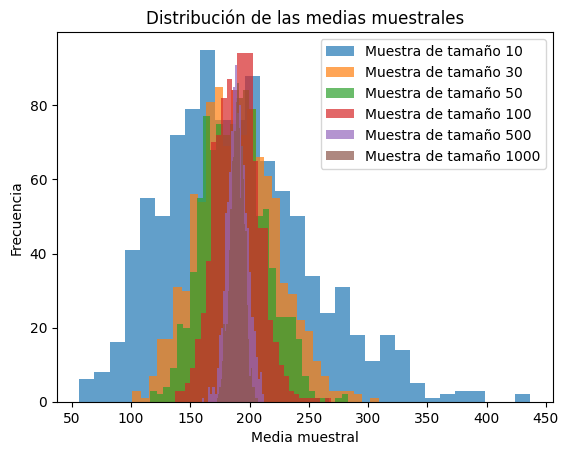

In [ ]:
# Simulación para verificar TLC
sample_sizes = [10, 30, 50, 100, 500, 1000]
for size in sample_sizes:
    sample_means = [df['cnt'].sample(size, replace=True).mean() for _ in range(1000)]
    plt.hist(sample_means, bins=30, alpha=0.7, label=f'Muestra de tamaño {size}')

plt.legend()
plt.title('Distribución de las medias muestrales')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

### **Respuesta pregunta 3**

> A medida que aumenta el tamaño de la muestra, la distribución de las medias se aproxima a una normal. Esto valida el Teorema Central del Límite y muestra que, para tamaños de muestra a partir de 30 o 50, podemos aplicar métodos estadísticos basados en la normalidad con mayor confianza.



## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

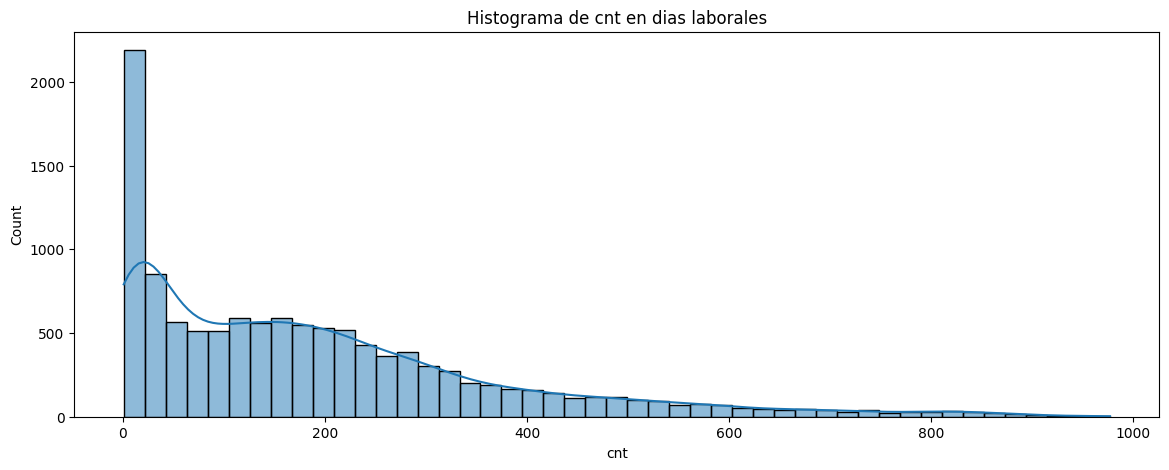

193.20775389801938 185.10747659123103 11865


In [13]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']
plt.figure(figsize=(14, 5))
sns.histplot(cnt_laborales, kde=True)
plt.title('Histograma de cnt en dias laborales')
plt.show()

# Valor de referencia para la prueba
valor_hipotesis = 4500
#media de 1700 != media de 4500
#prueba de hipotesis (media muestral de 1700= media poblacional 4500, hipotesis nula)
# prueba alternativa (media de 1700 DIFERENTE media poblacional4500, Hipoteis alternativa)
media_muestral = cnt_laborales.mean()
Desviacion_estandar = cnt_laborales.std()
n = len(cnt_laborales)
print(media_muestral, Desviacion_estandar, n)

#Realizar el test de hipotesis
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

# Interpretar los resultados

### **Interpretación pregunta 4**
Al observar el histograma, se nota que los datos de cnt en días laborales están cargados hacia el lado derecho, lo que indica que no siguen una distribución normal. Por esta razón, no es adecuado hacer un análisis que dependa de la normalidad de los datos sin antes ajustarlos o usar otro tipo de métodos. Si no se tiene en cuenta esto, los resultados del análisis podrían no ser confiables.

In [14]:
from scipy.stats import ttest_1samp

# Filtramos solo los días laborales (workingday == 1)
working_days = df[df['workingday'] == 1]

# Test t de una muestra
t_stat, p_value = ttest_1samp(working_days['cnt'], 4500)

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos H0: La media de cnt es diferente a 4500.")
else:
    print("No se puede rechazar H0: No hay evidencia suficiente para decir que la media de cnt es diferente de 4500.")


t-statistic: -2534.333902273014
P-value: 0.0
Rechazamos H0: La media de cnt es diferente a 4500.


## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

Datos observados (n=80)
- Media    (θ̂): 187.62
- Mediana  (θ̂): 172.50

Intervalos de confianza (Bootstrap percentil, 95%)
- Media   : [148.36, 226.64]
- Mediana : [70.00, 198.00]


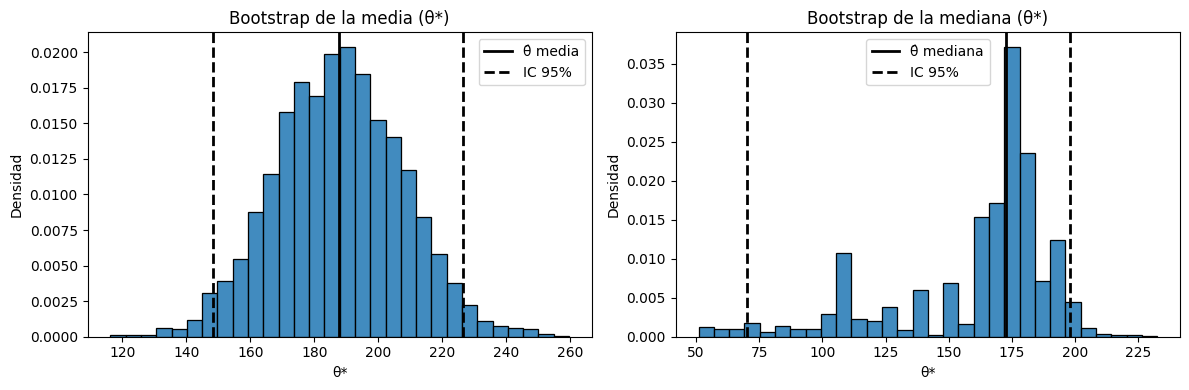


Interpretación:
- La distribución bootstrap aproxima cómo habría variado el estimador si hubiéramos repetido el muestreo real.
- El IC percentil toma directamente los percentiles 2.5% y 97.5% de esa distribución simulada.
- La mediana suele tener distribución muestral menos 'normal' que la media; el bootstrap es especialmente útil allí.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de los datos (ejemplo)
rng = np.random.default_rng(2025)

# Supongamos que 'data' es tu muestra observada
n = 80
data = rng.choice(df['cnt'], size=n, replace=False)  # Sustituye df['cnt'] por tus datos reales
theta_hat_mean = data.mean()
theta_hat_median = np.median(data)

print(f"Datos observados (n={n})")
print(f"- Media    (θ̂): {theta_hat_mean:,.2f}")
print(f"- Mediana  (θ̂): {theta_hat_median:,.2f}")

# Bootstrap por remuestreo con reemplazo
B = 3000
boot_means = np.empty(B)
boot_medians = np.empty(B)

for b in range(B):
    sample_b = rng.choice(data, size=n, replace=True)
    boot_means[b] = sample_b.mean()
    boot_medians[b] = np.median(sample_b)

# ICs percentil 95%
ci_mean = np.percentile(boot_means, [2.5, 97.5])
ci_median = np.percentile(boot_medians, [2.5, 97.5])

print("\nIntervalos de confianza (Bootstrap percentil, 95%)")
print(f"- Media   : [{ci_mean[0]:.2f}, {ci_mean[1]:.2f}]")
print(f"- Mediana : [{ci_median[0]:.2f}, {ci_median[1]:.2f}]")

# Visualización de las distribuciones bootstrap
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(boot_means, bins=30, stat='density', alpha=0.85, ax=axes[0])
axes[0].axvline(theta_hat_mean, color='k', linestyle='-', linewidth=2, label='θ̂ media')
axes[0].axvline(ci_mean[0], color='k', linestyle='--', linewidth=2, label='IC 95%')
axes[0].axvline(ci_mean[1], color='k', linestyle='--', linewidth=2)
axes[0].set_title("Bootstrap de la media (θ*)")
axes[0].set_xlabel("θ*")
axes[0].set_ylabel("Densidad")
axes[0].legend()

sns.histplot(boot_medians, bins=30, stat='density', alpha=0.85, ax=axes[1])
axes[1].axvline(theta_hat_median, color='k', linestyle='-', linewidth=2, label='θ̂ mediana')
axes[1].axvline(ci_median[0], color='k', linestyle='--', linewidth=2, label='IC 95%')
axes[1].axvline(ci_median[1], color='k', linestyle='--', linewidth=2)
axes[1].set_title("Bootstrap de la mediana (θ*)")
axes[1].set_xlabel("θ*")
axes[1].set_ylabel("Densidad")
axes[1].legend()

plt.tight_layout()
plt.show()

# **Interpretación pregunta 5**

Interpretación:
- La distribución bootstrap aproxima cómo habría variado el estimador si hubiéramos repetido el muestreo real.
- El IC percentil toma directamente los percentiles 2.5% y 97.5% de esa distribución simulada. (intervalos de confianza al 95%)
- La mediana suele tener distribución muestral menos 'normal' que la media; el bootstrap es especialmente útil allí.
